In [1]:
import os
import pandas as pd

from tfcomb import CombObj
import tfcomb.objects

In [10]:
directory = '/Users/user/Desktop/tomato_atac/tfcomb3/bed/novel'
directory_contents = [name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))]
print(directory_contents)

# create folder for output files
for subdir in directory_contents:
    bn = os.path.splitext(subdir)[0]
    if subdir != '.DS_Store':
        print(bn)
        os.mkdir(os.path.join(directory, bn))
        os.mkdir(os.path.join(directory, bn, 'total'))
        os.mkdir(os.path.join(directory, bn, 'selected_sig'))
        os.mkdir(os.path.join(directory, bn, 'HSF_selected_sig'))
        os.mkdir(os.path.join(directory, bn, 'HSF_selected_sig', 'cluster'))
        print('Finished' + subdir + '!')

[]


INFO: Reading sites from '/Users/user/Desktop/tomato_atac/tfcomb2/bed/similar/similar_ATAC_M82_6h_vs_ATAC_M82_0h_proximal_down.bed'...
INFO: Processing sites
INFO: Read 148 sites (23 unique names)
Internal counts for 'TF_counts' were not set. Please run .count_within() to obtain TF-TF co-occurrence counts.
INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Running with multiprocessing threads == 1. To change this, give 'threads' in the parameter of the function.
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules
INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to c

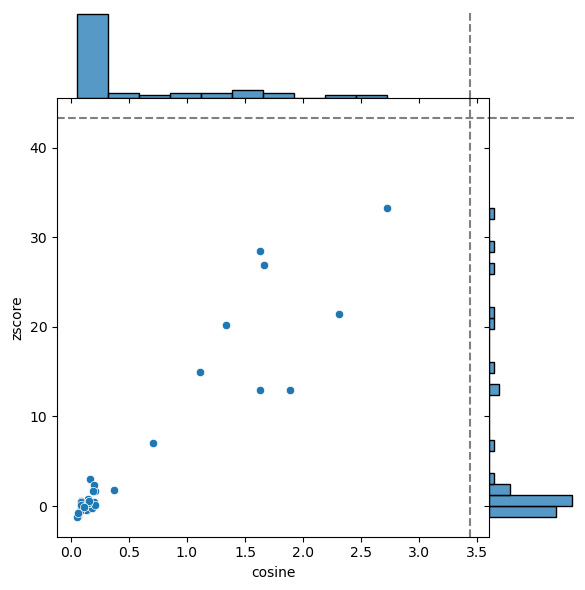

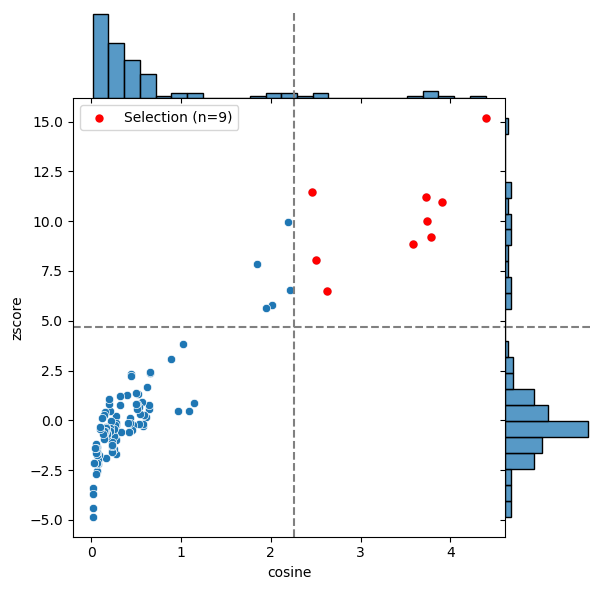

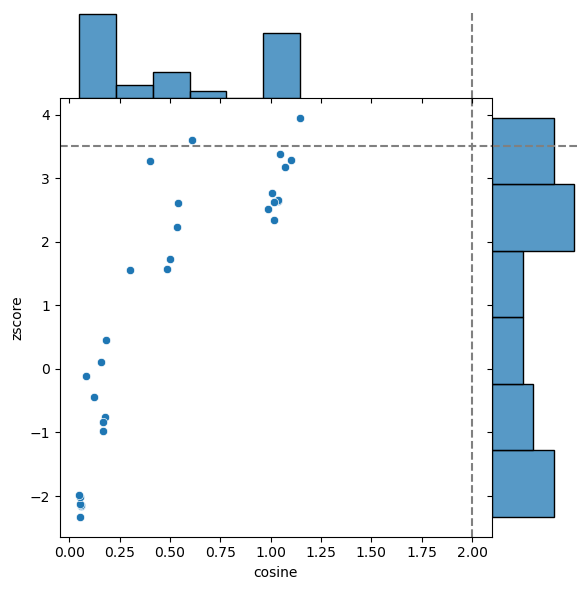

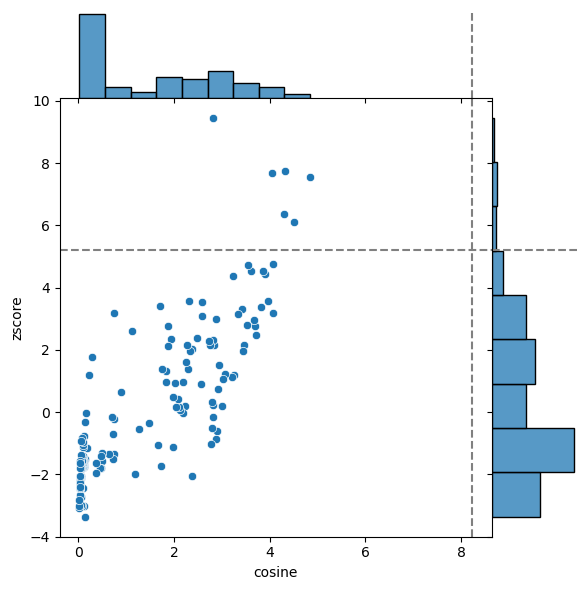

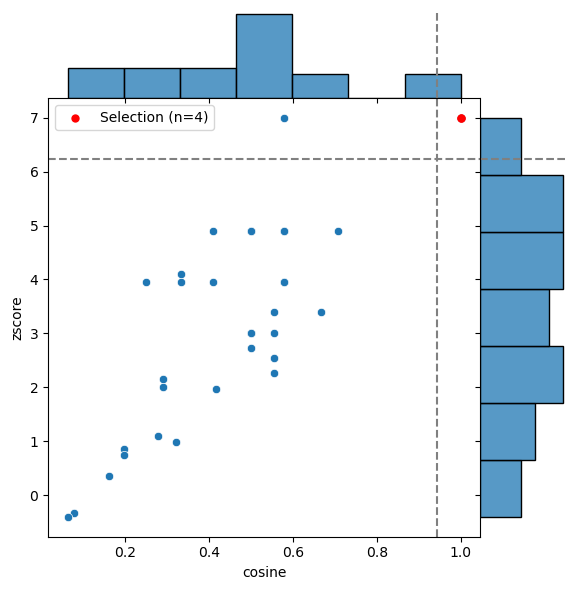

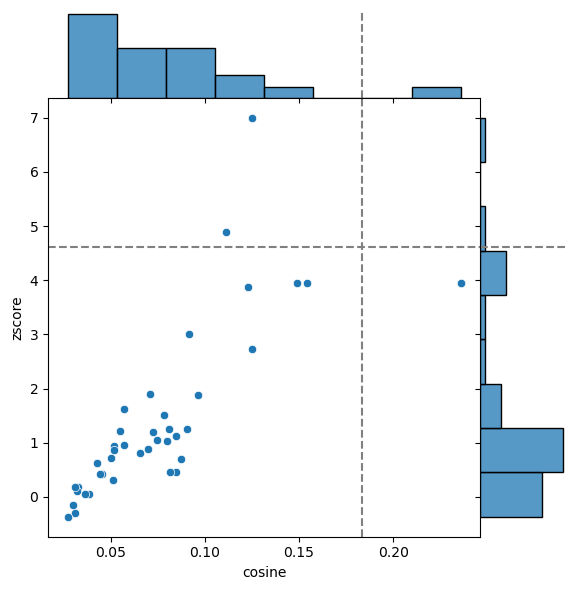

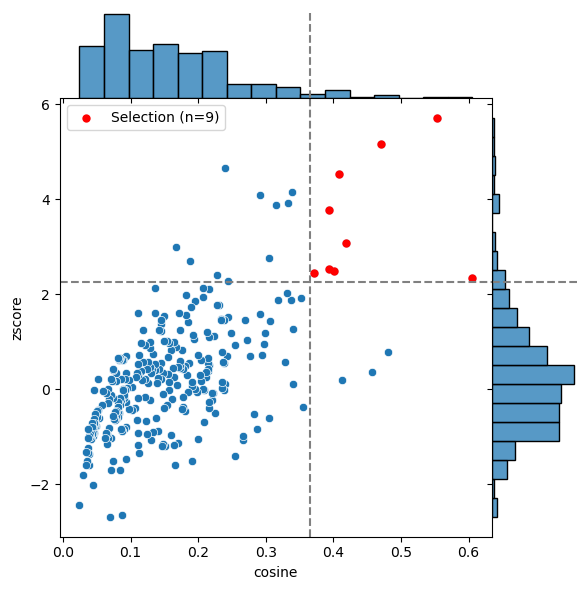

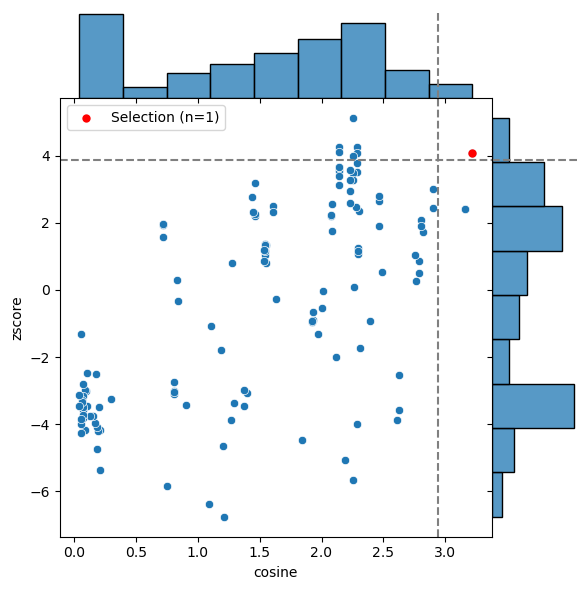

In [9]:
directory = '/Users/user/Desktop/tomato_atac/tfcomb2/bed/similar'
directory_contents = [name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))]

for subdir in directory_contents:
    if subdir != '.DS_Store':
        file = os.path.join(directory, subdir)
        # extract base name
        bn = os.path.splitext(subdir)[0]

        # load TFBS from bed file
        C = CombObj()
        C.TFBS_from_bed(file)
        
        ###### TOTAL RULES ######
        # find market basket rules
        C.market_basket()
        C.rules.head()

        # simplify rules without duplicated ones
        C.simplify_rules()
        ## export records
        C.to_pickle(os.path.join(directory, bn, 'total', bn + '.pkl'))
        ## export table
        export1 = C.rules
        export1.to_csv(os.path.join(directory, bn, 'total', bn + '.txt'),
                    sep='\t', index=False, header=True)
        ############


        ###### SELECTED & SIGNIFICANT RULES ######
        # load TFBS from pkl file
        C = CombObj()
        C = tfcomb.objects.CombObj().from_pickle(os.path.join(directory, bn, 'total', bn + '.pkl'))
        C
        
        # top 5% cosin and zscore as cut-off
        export2 = C.select_significant_rules(x_threshold_percent=0.05, y_threshold_percent=0.05)

        ## export records
        export2.to_pickle(os.path.join(directory, bn, 'selected_sig', bn + '.pkl'))
        ## export table
        export2.rules.to_csv(os.path.join(directory, bn, 'selected_sig', bn + '.txt'),
                    sep='\t', index=False, header=True)
        ############


        ###### HSF SELECTED & SIGNIFICANT RULES ######
        # load TFBS from txt file
        # top 1% cosin and zscore as cut-off
        # at least one HSF k-mers in each rules
        export3 = pd.read_csv(os.path.join(directory, bn, 'selected_sig', bn + '.txt'), sep = '\t')
        
        # Filter rows where TF1 or TF2 contains 'HSF'
        filtered_export3  = export3[export3 ['TF1'].str.contains('HSF', na=False) | export3['TF2'].str.contains('HSF', na=False)]

        # Print the filtered DataFrame
        print(filtered_export3)

        ## export table
        filtered_export3.to_csv(os.path.join(directory, bn, 'HSF_selected_sig', bn + '.txt'),
                    sep='\t', index=False, header=True)
        ############ 


        ###### ADD CLUSTERS TO HSF SELECTED & SIGNIFICANT RULES ######
        # load TFBS from pkl file 
        # C = CombObj().from_pickle(os.path.join(directory, bn, 'HSF_selected_sig', bn + '.pkl'))
        # C

        # add clustering
        # C.cluster_network()
        # export4 = C.TF_table

        ## export table
        # export4.to_csv(os.path.join(directory, bn, 'HSF_selected_sig', 'cluster', bn + '_network_cluster' + '.txt'),
                    # sep='\t', index=False, header=True)
        ############
        
        print('Finished ' + bn + '!')
print('Finished all!')